<a href="https://colab.research.google.com/github/deutschkihun/KaggleStudy/blob/master/Prediction_orthopedic_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction : orthopedic patients

## Introduction 

There are a lot of informations about how to learn machine learning.If you are looking for machine learning tutorial,this study is definitely help you to understand what is machine learning and how we can start that

I prepared questions which is asked frequently from beginner

1. "Why do we have a machine learning tutorial in the end?" 

The reason is that we need to analyze and clean the data in order to get better result of prediction. Actually the prediction part possesses about 20-30% of whole data science work. Assessing,Cleaning and Feature Engineering are definitely bigger part than prediction and also take more time to finish it. So we can't ignore Data analysis part before we dive into machine learninig.

2. "Which language is proper for data scienece?"

There are many different ways that you can do data science.But I strongly recommende you **Python**.Python is most powerful language that you can do everything for data science,machine learning and further deep learninig. 


3. "Which project shoud I choose for my first project?"

The most popular dataset that beginners use for their first project is **Titanic**.I also agree that **Titanic** is very good resources that you can learn machine learning.But Titinac has a lot of feature that you have to handle it.Based on my experience that was really confuesd me what I have to in each step. But this project we will handle only 6 features.That's a unrealistical dataset but proper for training. 



## 1. Exploratory Data Analysis 


## 1.1 Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image


In [0]:
# Data Gathering from Kaggle
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Machine learning for beginner/data.csv')

## 1.2 Duplication

In [7]:
sum(df.duplicated())

0

## 1.3 Missing Value

In [0]:
df.isna().sum().sum()

## 1.4 Correct datatype

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


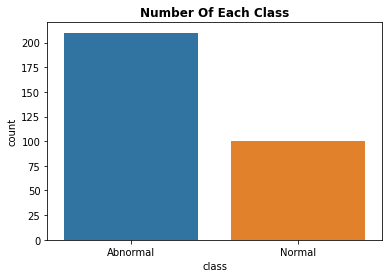

In [14]:
# Univariate Visualization (use one variable for visualization)
# Countplot 
ax = sns.countplot(data=df,x='class')
plt.title('Number of each class'.title(),
         fontsize=12,weight='bold')
plt.show()

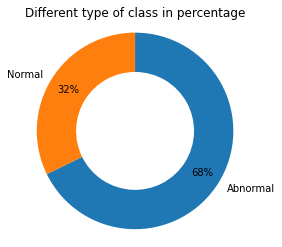

In [15]:
# Pie chart  
sorted_counts = df['class'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');
plt.title('Different type of class in percentage')
plt.axis('square');

#### Observation 

Spondylolisthesis : Abnormal:**68%** and Normal:**32%**. So Abnormal possesses **over 50%** of whole dataset. 

# Part 2 Feature Engineering

In order to do bivariate and multivariate visualization we have to do Feature engineering.Because we are stucked in statistical quality problem

#### Statistical quality problem 

As we saw above values of each columns has different interval. For example 
- pelvic_tilt numeric: [-6.55,49,4]
- degree_spondylolisthesis: [-11.058,418,54]
This case is very extreme, but it's happened also in the other dataset.What we do next is we have to standardize values so that we can get all values in the limited interval. 

This is we called **Standardization**. 

## $$ z_{score} = \frac {(x- \mu)}{\sigma}$$

**Z_score** is a value which we through the formulat.It assumes that data is **normally distributed** within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1. If data is not normally distributed, this is not the best Scaler to use.

- Z = standard score or z score , this score tells us you how many standard deviations from the mean your score is.
- x = observed value
- $\mu$ = mean value of dataset
- $\sigma$ = standard deviation of dataset

In [0]:
x = df.iloc[:,:-1]
# x is input data and it means sub features that we're going to use as a factor of orthopedic patients
y = df['class']
# y is output data and it means the result of sub feature combination

# standardization
stand = (x - x.mean()) / (x.std())

And the next thing that I'm going to do is convert form string to numeric value. This process is acutally fundamental for machine learning.
For machine learning algorithms we need numeric value among other thing **binary number (Zero and One) ** 

So we will use dictionary functino to convert from Abnomral to **0** and from Normal to **1**

In [0]:
df.replace({"Abnormal": 0, "Normal": 1},inplace=True)

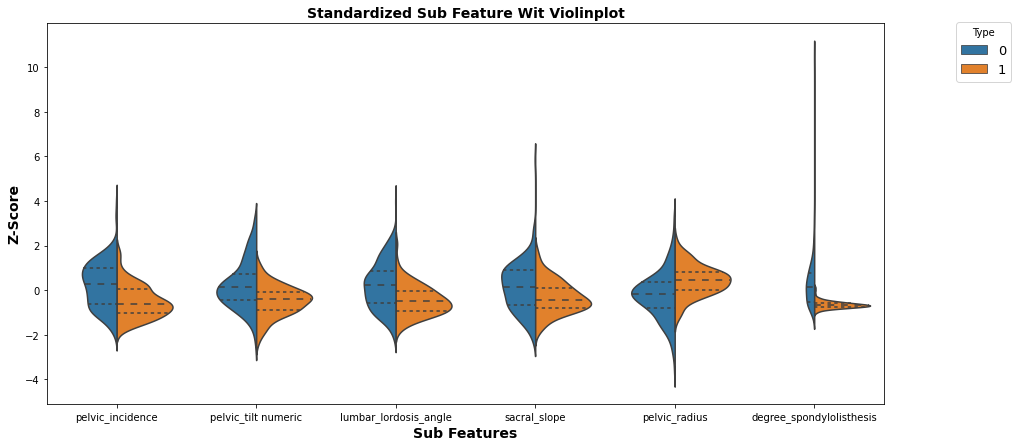

In [18]:
# Bivariate Visualization (use 2 variables for visualization)
data = pd.concat([y,stand],axis=1)


data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')

plt.subplots(figsize=(15,7))
sns.violinplot(data=data,x='features',y='value',split=True,hue='class',inner='quart')
plt.title('Standardized sub feature wit violinplot'.title(),
          fontsize = 14,weight='bold')

plt.legend(bbox_to_anchor=(1.16,1.02),title="Type",
          fontsize = 13)

plt.xlabel('sub features'.title(),
            fontsize=14,weight="bold")

plt.ylabel('Z-Score'.title(),
          fontsize=14,weight="bold");


#https://stackoverflow.com/questions/43585333/seaborn-countplot-set-legend-for-x-values

#### Observation 

Normally the Z-Score are distributed between -2 and 2.Thoughout we can get a clear distribution of each sub_features like above.

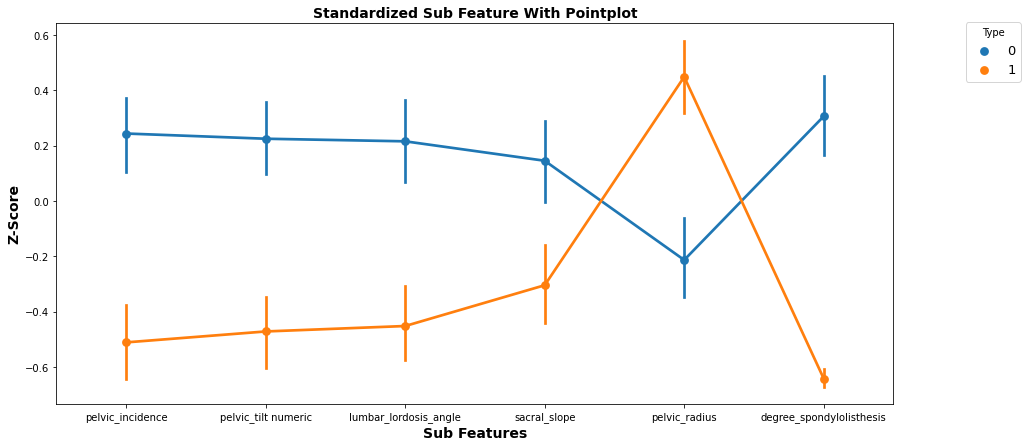

In [19]:
data = pd.concat([y,stand],axis=1)


data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')

plt.subplots(figsize=(15,7))
sns.pointplot(data=data,x='features',y='value',split=True,hue='class')
plt.title('Standardized sub feature with pointplot'.title(),
          fontsize = 14,weight='bold')

plt.legend(bbox_to_anchor=(1.16,1.02),title="Type",
          fontsize = 13)

plt.xlabel('sub features'.title(),
            fontsize=14,weight="bold")

plt.ylabel('Z-Score'.title(),
          fontsize=14,weight="bold");

#### Observation

Compare to violinplot we can get a important information that pelvic_radius is only one feature that in **Normal case** represents greater value score than **Abnormal score**. Probably we're going to guess that pelvic_radius is the most important feature to decide **Normal**.

We'll find out that later with machine learning algorithms

In [0]:
# Multivariate Visualization (use more than 2 variables for visualization)
x = df.iloc[:,:-1]
y = df['class']
stand = (x - x.mean()) / (x.std())
#This time we'll not concatnate, but we're goint to merge standardized value into the dataframe
df_new = pd.merge(y,stand, right_index=True, left_index=True)

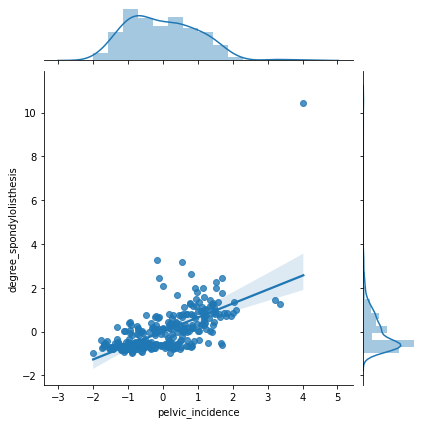

In [21]:
## Jointplot 
sns.jointplot(data=df_new,x='pelvic_incidence',y='degree_spondylolisthesis',kind="reg");
# pelvic_incidence vs degree_spondylolisthesis

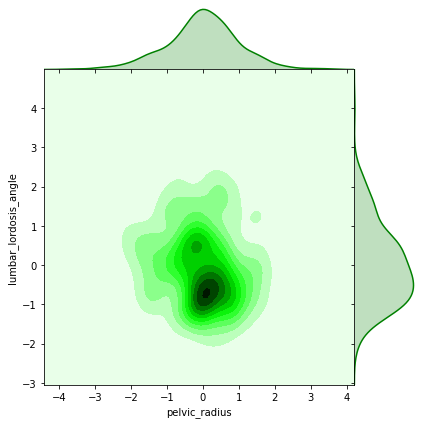

In [22]:
sns.jointplot("pelvic_radius", "lumbar_lordosis_angle", data=df_new,kind="kde", space=0, color="g");
# pelvic_radius vs lumbar_lordosis_angle 

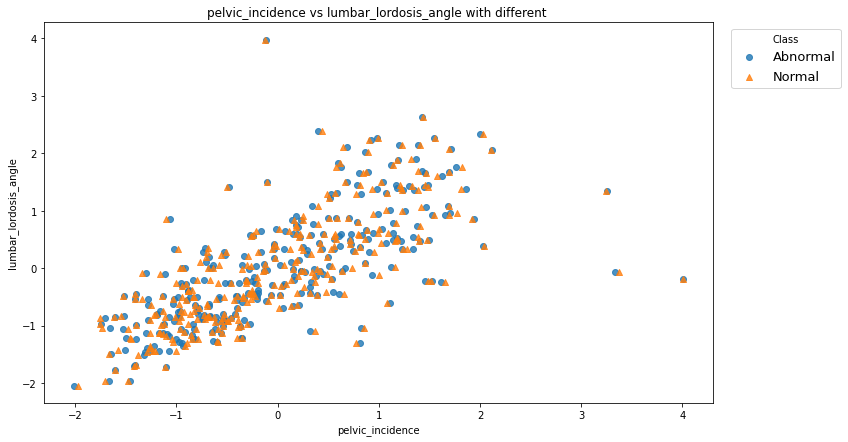

In [23]:
# plot with different size of scatter
plt.subplots(figsize=(12,7))
type_marker =[['0','o'],['1','^']]

for ttype,marker in type_marker:
    sns.regplot(data=df_new,x='pelvic_incidence',y='lumbar_lordosis_angle',x_jitter=0.04,marker=marker,fit_reg=False);

plt.xlabel('pelvic_incidence');
plt.ylabel('lumbar_lordosis_angle')
plt.legend(['Abnormal','Normal'],title='Class',
          fontsize = 13, bbox_to_anchor= (1.2,1))
plt.title("pelvic_incidence vs lumbar_lordosis_angle with different ");

#### Observation 

- In the first jointplot we can find outlier,which means is not proper dataset

- In the second jointplot shows that Z_score of variables are located in pelvic_radius = 0 & lumbar_lordosis_angle =1 

- Scatterplot show roughly linear regression line on the graph with plot. The tendency of 2 classes is almost same. In many time those classes are overlapped together

## Part 3 : Prediction 

We have gained some insights form the EDA part. But with that, we can't accurately predict or tell whether orthopedic patients or not. 

So now we'll predict whether orthopedic patients or not by using some popular Classification Algorithms.Following are the algorithms I will use to make a model 


1. Logistic Regression
2. Support Vector machine (SVM) / Linear SVM
3. Random forest
4. KNN (K Nearest Neighbors)
5. Navie Bayes
6. Decision Tree

Everytime when you're going to predict something you have to first split **train data** and **test data**
**train data** is a dataset that machine will use it to learn model. **test data** is a dataset that machine will use to predict the result. So this process is the most important part that you have to do always beginning of the part. Otherwiese your prediction is not accurately and has gotten different prediction score in each time when you run  algorithms.

In [0]:
# Load sci-kit learn libraries 

from sklearn.linear_model import LogisticRegression 
# Logistic Regression
from sklearn import svm
# Support vector machine
from sklearn.ensemble import RandomForestClassifier
# Random Forests
from sklearn.neighbors import KNeighborsClassifier
# KNN
from sklearn.naive_bayes import GaussianNB
# Naive Bayes
from sklearn.tree import DecisionTreeClassifier
# Decision Tree

# For split the dataset 
from sklearn.model_selection import train_test_split
from sklearn import metrics 


In [0]:
train,test =train_test_split(df,test_size=0.2,random_state=0,stratify=df['class'])

# Training_data:80% and Test_data:20%

train_X = train[train.columns[:-1]]
train_Y = train[train.columns[-1]]
test_X = test[test.columns[:-1]]
test_Y = test[test.columns[-1]]

# Define X,Y columns of train and test dataset

### Logistic Regression 

In [40]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('Accuracy of logistic Regression is',str((metrics.accuracy_score(prediction,test_Y))*100)+'%')

Accuracy of logistic Regression is 85.48387096774194%


### SVM

If there is no additional mention about SVM.We say generally kernel = rbf, which mean we take exponential function

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [41]:
model = svm.SVC(kernel='rbf',gamma=0.1,C=1)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('Accuracy of Support vector machine is',str((metrics.accuracy_score(prediction,test_Y))*100)+'%')

Accuracy of Support vector machine is 67.74193548387096%


### Linear SVM

In [43]:
model = svm.SVC(kernel='linear',gamma=0.1,C=1)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('Accuracy of linear SVM is',str((metrics.accuracy_score(prediction,test_Y))*100)+'%')

Accuracy of linear SVM is 83.87096774193549%


### Random Forest

In [46]:
model = RandomForestClassifier(random_state=0)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('Accuracy of Random Forest is',str((metrics.accuracy_score(prediction,test_Y))*100)+'%')

Accuracy of Random Forest is 85.48387096774194%


### KNN 

In [47]:
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('Accuracy of KNN is',str((metrics.accuracy_score(prediction,test_Y))*100)+'%')

Accuracy of KNN is 85.48387096774194%


### Naive Bayes 

In [48]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('Accuracy of Navie Bayes is',str((metrics.accuracy_score(prediction,test_Y))*100)+'%')

Accuracy of Navie Bayes is 82.25806451612904%


### Decision Tree

In [50]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('Accuracy of Decision Tree is',str((metrics.accuracy_score(prediction,test_Y))*100)+'%')

Accuracy of Decision Tree is 90.32258064516128%


## Cross Validation

But there is a weakness that we didn't cover through 6 different machine learning models. As you might remembered we set 20% of whole dataset for testing and 80% for training. So model learned algorithms by training 80% of dataset.In the end model used 20% for prediction.

Is this result accurately?, Actually not.Because the data is imbalance, which means there may be a high number of class instances but less number of other class instances. So what we're going to do now is that we should train and test our algoritum on each every instance of the dataset. And then we'll calculate the average of accuracies.

For that we'll implement **K-Fold Cross Validation** 
Throuhgout we can achieve a generalized model in order to avoid underfitting and overfitting 

- 1) we divide the dataset into k-subset (by default k=5) 
- 2) In 1.iteration of k you set particular size of data like 20% or 30% for test and all the other thing is belonging to traing set
- 3) Do prediction and get accuracy 
- 4) In the 2.iteration of k you set same size of data sqeuential.Do not overlap datataset that you used before as a test set
- 5) Repeat step 3
- 6) Iterate K time and make a average of accuracies 




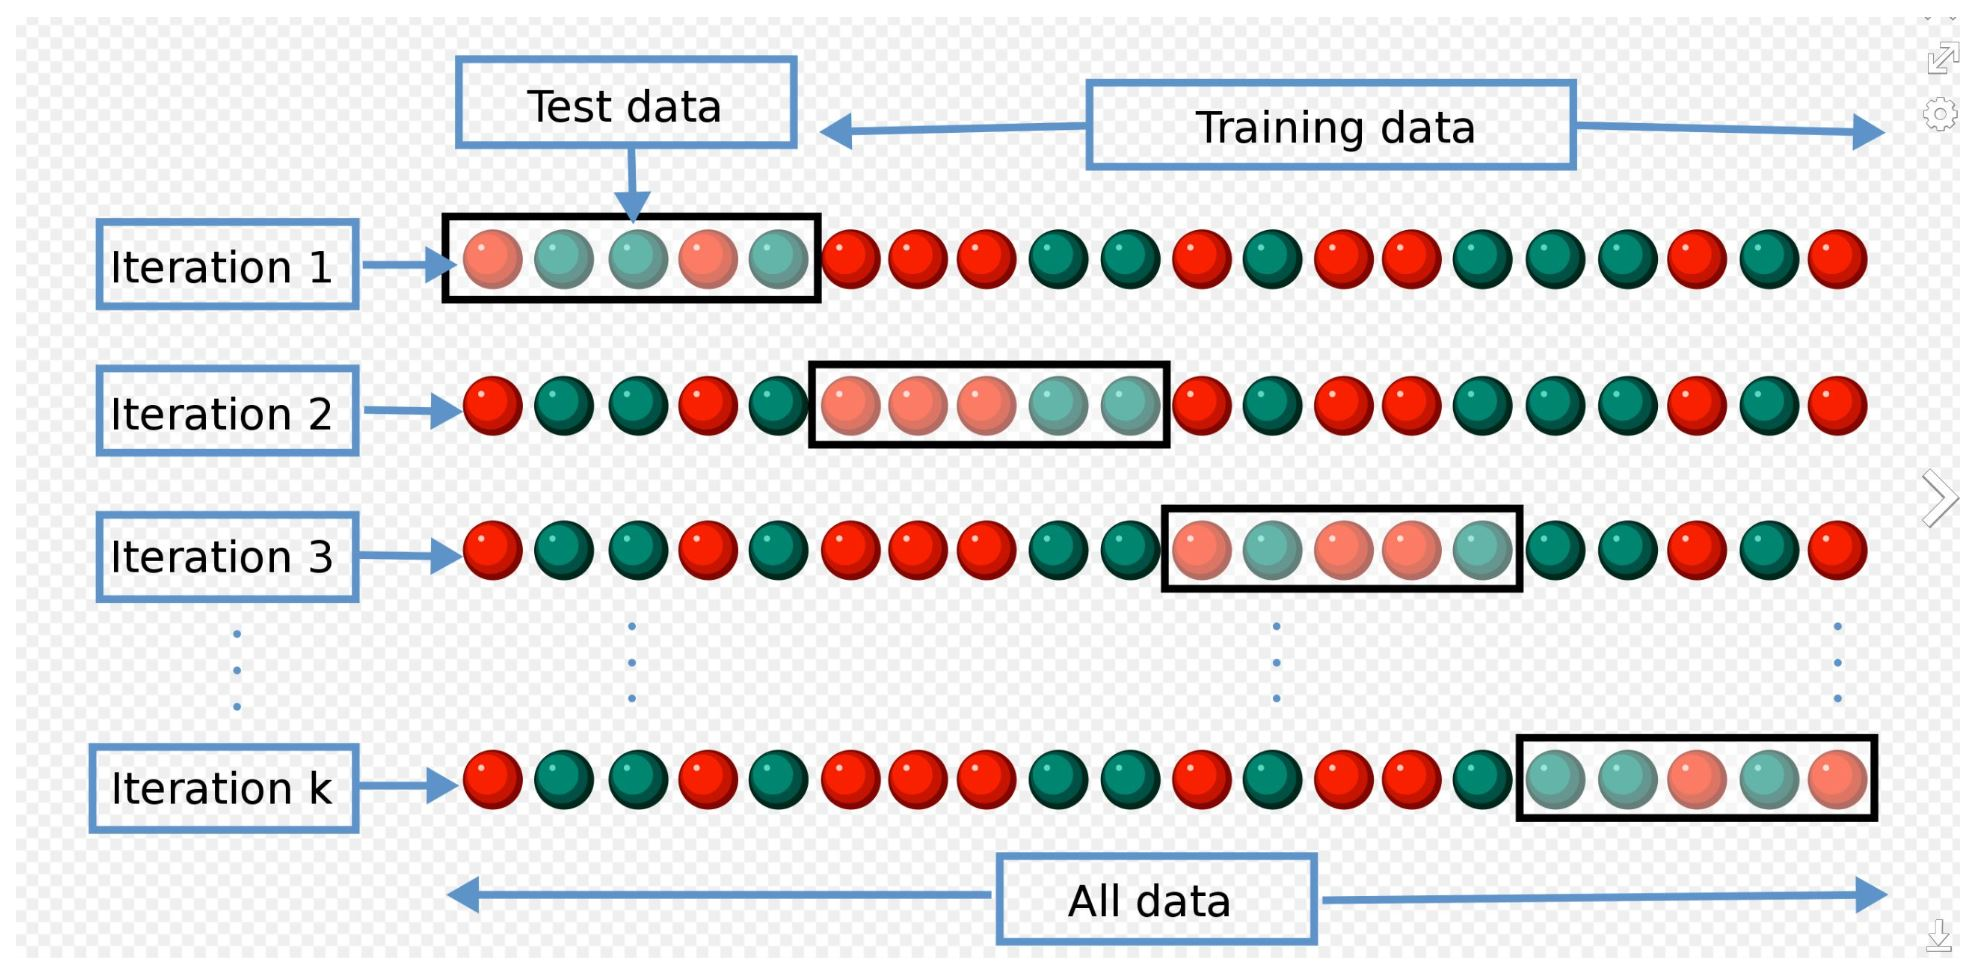

In [54]:
Image('/content/drive/My Drive/Colab Notebooks/Kaggle/Machine learning for beginner/K-Fold CV.JPG')

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# score evaluation
from sklearn.model_selection import cross_val_predict
# prediction
kfold = KFold(n_splits=20,random_state=10)


# Now we have a Cross Validation model with 10 iterations.In the next part we'll iterate 20 K-Fold Cross validation and get a mean of accuracies
# Advandatage : We don't need to train_test split because if we split data into k_subset we'll automatically (1/k)percentage as a test data size.
# Our case : 1/20 = 5%

In [56]:
# First we need empty list to fill out iterated data

accuracy_mean = []
accuracy_std = []
accuracy = []


x = df.iloc[:,:-1]
y = df['class']


classifiers = ['Logistic Regression','SVM','Linear SVM','Random Forest','KNN','Naive Bayes','Decision Tree']
models =[LogisticRegression(),svm.SVC(kernel='rbf'),svm.SVC(kernel='linear'),RandomForestClassifier(random_state=0),
         KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier()]


for i in models :
    cv_result = cross_val_score(i,x,y,cv=kfold,scoring='accuracy')
    accuracy_mean.append(cv_result.mean())
    accuracy_std.append(cv_result.std())
    accuracy.append(cv_result)
accuracy_table = pd.DataFrame({'CV mean':accuracy_mean,'CV std':accuracy_std},index=classifiers)
accuracy_table



,CV mean,CV std
Logistic Regression,0.829167,0.160803
SVM,0.804583,0.199652
Linear SVM,0.832292,0.147707
Random Forest,0.802917,0.178541
KNN,0.809375,0.169839
Naive Bayes,0.771667,0.325511
Decision Tree,0.769375,0.171058


#### Observation 

Result of CV mean is not good like without cross validation. In the next part we'll visualize it 

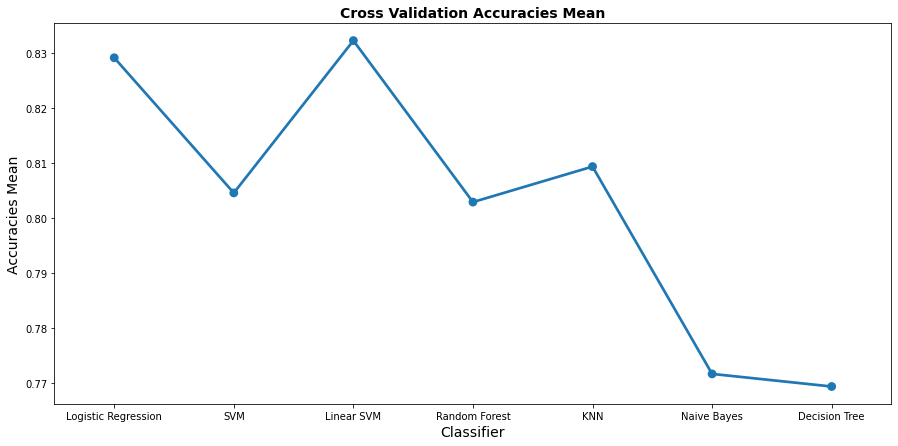

In [57]:
plt.subplots(figsize=(15,7))
sns.pointplot(x=accuracy_table.index,y=accuracy_table['CV mean'])
plt.title('Cross Validation accuracies mean'.title(),
          fontsize = 14,weight='bold')

plt.xlabel('Classifier'.title(),
            fontsize=14)

plt.ylabel('accuracies mean'.title(),
          fontsize=14);

#### Observation 

**Linear SVM** shows the best accuracies mean result : **about 83.2%**

### Hyperparameter tuning  

In the last part we found that Linear SVM show the best performing algorithm.Now we'll try to tune the parameter to find out the best accuracy result. 

There are 4 hyperparameter tuning methods 

- Grid search
- Baysian optimization
- Manual tuning 
- Randomized search

We'll implement **Grid Search** and **Randomized search** in this kernel

#### Grid search
> Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient.

#### Random search
>Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. 

#### In which case is proper to use random search and grid search?
> With small data sets and lots of resources, Grid Search will produce accurate results. However, with large data sets, the high dimensions will greatly slow down computation time and be very costly. 


Reference : https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85

In [58]:
#SVM with GridSearchCV
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8129032258064516
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   17.7s finished


#### Observation 

So we found that the combination for best accuracy is **about 81.3%** with **linear,gamma=0.1,C=0.1**

In [59]:
#Random Forest with Random search 
from sklearn.model_selection import RandomizedSearchCV

dict = {'n_estimators':[100,200,300,400,500],
        'max_depth': [3,5,7,10,None],
        'criterion':['gini','entropy'],
        'bootstrap':[True,False],
        'max_leaf_nodes':[3,5,7,10,None]}
gd=RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0),param_distributions=dict)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_estimator_)

0.8129032258064516
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Observation 

So we found that the combination for best accuracy is about 81.0% with bootstrap=False,cruterion=gini,max_depth=7,max_leaf_nodes=None and n_estimator=500

### Ensemble 

Ensembling is the combination of various simple models to create powerful model

In this kernel I'll introduce 3 most popular ensembling methods.

- Voting

- Bagging

- Boost 

### Voting 

It give an average prediction result based on the prediction of all the submodels.There are 2 kinds of voting systems 

1) Hard Voting : This system is based on the principle of majority vote. For example there is a image,which represent a number. We used 5 different algorithms to predict what is this number exactly. So 4 models said "this is Number **Zero**", but only one model said "this is number **Nine**. So the principle of majority vote we can say this number is **Zero**.

2) Soft Voting : This system is based on the average of accuracies. Same situation as before, but we'll make a tabel here. What we put on the table is the accuracy of each model to each number.We set candidate of number form **Zero to Nine** and each 5 models predict and bring the accuracy of each number. In the end we will calculate the mean of each number and choose the highest accuracy mean. 

In this kernel we'll use **Soft Voting**

In [60]:
# Soft Voting
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)

# voting parameter : hard or soft 
# hard : majority rule voting
# soft : predicted probabilities,which is recommended for a ensemble of well-calibrated classifiers.
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,x,y, cv = 10,scoring = "accuracy")
# cv is the number of spliting 
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8870967741935484
The cross validated score is 0.8193548387096774


#### Observation

Wow !!! This result is the best accuracyresult that we have gotten : **88%**

But sadly cv score is about **82%**

### Bagging (also we called Bootstrap aggregating)

It works by applying similar classifier on small partitions of the dataset and then taking the average of all prediction.
Due to averaging,there is a reduction in variance.Bagging works best with high variance like Decision Tree or Random Forest.

1) As usual we split test- and train dataset.Bagging picks sample data **randomly with replacement** from train and make a **Bag**.

2) With Replacement means : Bag allows to overlap the data.That means we can pick same data one than one time.

3) Bag can not only one but also more than one.We represent **m** as a number of bag.**n** is number of traning instance data and **n_prime** is the number of instances we put into the bag. (n_prime < n)

4) We train each bag and then get a model. Now x will be used input data and from there output data is printed out

5) Finally calculate mean of outdata and it's called **Y**

Reference : https://www.youtube.com/watch?v=2Mg8QD0F1dQ 

In [61]:
# Bagging with Decision Tree

# Remember 
'''
train_X = train[train.columns[:-1]]
train_Y = train[train.columns[-1]]
test_X = test[test.columns[:-1]]
test_Y = test[test.columns[-1]]
'''



from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of Decision Tree is :',metrics.accuracy_score(prediction,test_Y))
result =cross_val_score(model,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree is :',result.mean())

The accuracy of Decision Tree is : 0.8387096774193549
The cross validated score for Decision Tree is : 0.8129032258064516


#### Observation 

Not bad.But not the best result.We have to try another methods to find better prediction accuracy

### Boosting 

Boosting algorithm combines with weak learner model to build strong prediction moel.Many people are confused what is actually different between **Bagging and Boosting**.

As I mentioned above Boosting combines with weak learner model.That implies after first Iteration of predicton Boosting algorithm investigates which case give a signal that it predict not well.And then Boosting algorithm aggregate other weak predciton casese and combine together to make a strong prediction model. In other words Boosting reduces the error residual of Tree or iteration one step before.

We can also say Boosting is a extended line of Decision Tree.Because Boosting constructs strong model by collecting lots of weak decision tree casese.

Also there is no randomness (Bagging has a randomness).This is a best classfication algrithms that we can use for prediction. 


Threr are 3 different Boosting Model

- AdaBoost (Adaptive Boost)
- Gradient Boost
- XGBoost (extreme gradient boost)

Reference : https://www.youtube.com/watch?v=GM3CDQfQ4sw&t=1s

### AdaBoost

This algorithm is explained already above. AdaBoost is a representative of Boosting model and implemented many times.

In [62]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
# By defalut of base_estimators it's decision tree automatically 
# Learning rate is a tuning parameter in an optimization parameter algoritm that determines the step size at each iteration 
# while moving toward a minimum of a loss fuction. Learning rate shrinks the contribution of each classifier 
result = cross_val_score(model,x,y,cv=10,scoring="accuracy")
print('The cross validated score of AdaBoost is :',result.mean())

The cross validated score of AdaBoost is : 0.8096774193548386


### Gradient Boost

This algoritum is similar to AdaBoosting,But differ from it on certain aspects.In this method we try yo visualize the boosting problem as an optimization probem, i.e we take yup a loss fuction and try yo optimize it.


We take up a weak learner(not well predicted) and at each step, we add another weak learner to increase the performance and build a strong learner.

This reduces the loss of the loss fuction.The loss represents the erro residuals(different between actual value and predicted value) 
Using this loss value for prediction is updated to minimize the redisual.

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
result = cross_val_score(model,x,y,cv=10,scoring="accuracy")
print('The cross validated score of Gradient decent Boosting is: ',result.mean())

The cross validated score of Gradient decent Boosting is:  0.7967741935483871


### XGBoost (also called extreme Gradient Boost)

This algorithms is made to cover drawback of Gradient Boosting. 

1) Overfitting

2) Long running time 

So XGBoost cover those problem
1) Faster than Gradient Boost (but we can't say that XGBoost is absolutely fast running time algorithm)

2) contains Regularization term ,which means aviod overfitting

3) It's possbile to apply in not only Classification but also Regression

The principle of XGBoost is same as Gradient Boost.And This algorithm is well known as a most popular Kaggle winner solution algorithm.
Furthermore this algorithms is not provided by sklearn library.So you need to install it yourself in your laptop wenn you want to use it in the local level like jupyter

Reference : https://xgboost.readthedocs.io/en/latest/index.html

In [64]:
from xgboost import XGBClassifier
xgboost=XGBClassifier(n_estimators=500,learning_rate=0.1)
result=cross_val_score(xgboost,x,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.7935483870967743


### Compute Feature importance

Sci-kit learn library provides the importance of feature in decimal number. Threr are many different ways that we can get a Feature importance. 

- Coefficients as Feature Importance
- Decision Tree Feature Importance
- Permutation Feature Importance

I'll show Decision Tree method to order the feature importance. 

Learn about other method please check out this link : https://machinelearningmastery.com/calculate-feature-importance-with-python/


**Decision Tree Feature Importance** contains 4 different sub methods

- DecisionTree Classifier 
- RandomForest Clasifier
- XGBoost
- AdaBoost 

[Text(0, 0, 'degree_spondylolisthesis'),
 Text(0, 0, 'pelvic_radius'),
 Text(0, 0, 'sacral_slope'),
 Text(0, 0, 'pelvic_tilt numeric'),
 Text(0, 0, 'lumbar_lordosis_angle'),
 Text(0, 0, 'pelvic_incidence')]

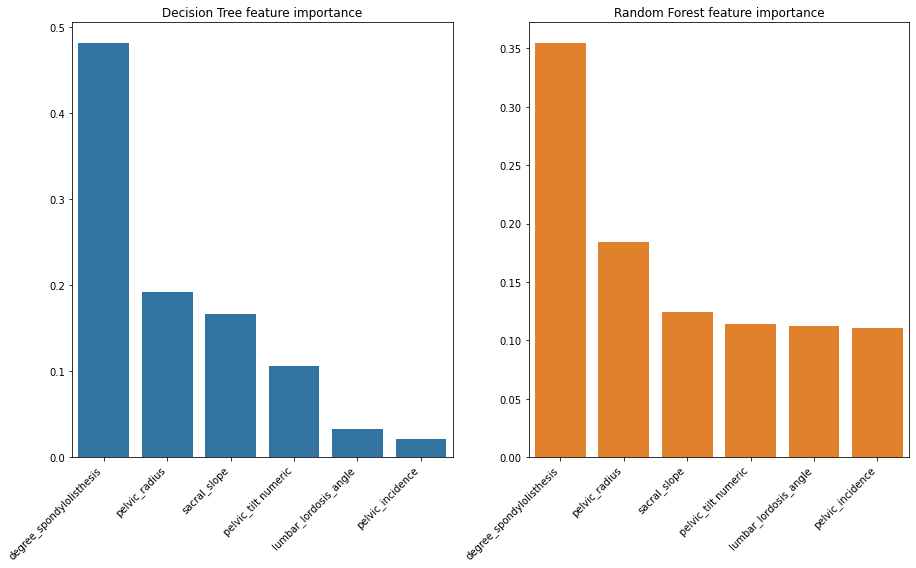

In [65]:
f,ax = plt.subplots(1,2,figsize=(15,8))

# Deicsion Tree
model =  DecisionTreeClassifier(random_state=0)
model.fit(x,y)
features = pd.Series(
     model.feature_importances_,
    index=x.columns).sort_values(ascending=False)
base_color = sns.color_palette()[0]
sns.barplot(x=features.index,y=features,ax=ax[0],color=base_color)
ax[0].set_title('Decision Tree feature importance')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')


# Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(x,y)
features = pd.Series(
        model.feature_importances_,
    index=x.columns).sort_values(ascending=False)
base_color = sns.color_palette()[1]
sns.barplot(x=features.index,y=features,ax=ax[1],color=base_color)
ax[1].set_title('Random Forest feature importance')
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')


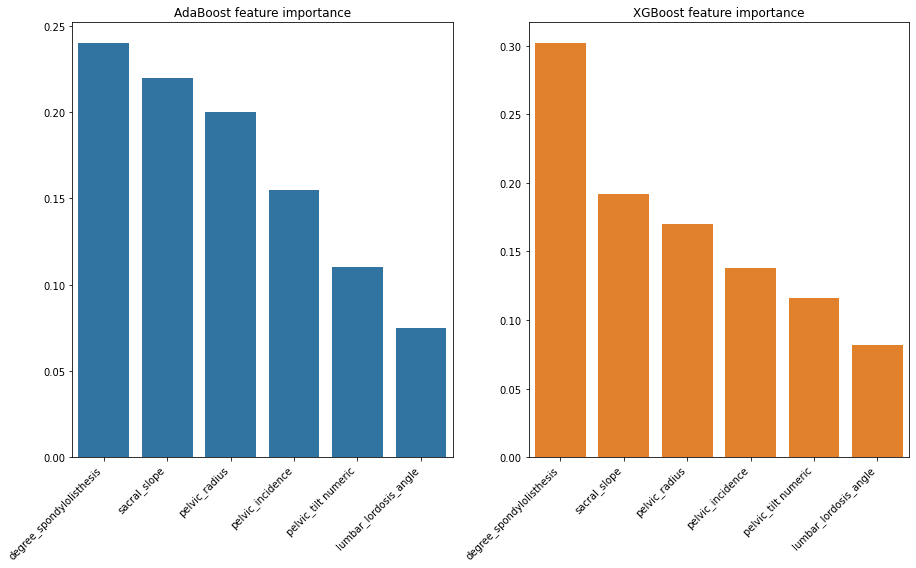

In [66]:
f,ax = plt.subplots(1,2,figsize=(15,8))

# AdaBoost
model = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
model.fit(x,y)
features = pd.Series(
        model.feature_importances_,
    index=x.columns).sort_values(ascending=False)
base_color = sns.color_palette()[0]
sns.barplot(x=features.index,y=features,ax=ax[0],color=base_color)
ax[0].set_title('AdaBoost feature importance')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right')



# XGBoost
model = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
model.fit(x,y)
features = pd.Series(
        model.feature_importances_,
    index=x.columns).sort_values(ascending=False)
base_color = sns.color_palette()[1]
sns.barplot(x=features.index,y=features,ax=ax[1],color=base_color)
ax[1].set_title('XGBoost feature importance')
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,horizontalalignment='right');

### Conclusion

Theere are tones of algorithms that you can apply on your dataset.But the important thing is that you try to find a approperiate model that brings best accuracy and low loss fuction. **Please predict your model manually**.There is no way that you can reach your best model.Just use possible method and model to predict dataset.

Thank you all very much 